<h1>Introduction to seaborn</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\datan\AppData\Local\Temp\ipykernel_14300\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
%matplotlib inline

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
#Styling
sns.set_theme()#Apply the default theme

<h1>Numerical Plots</h1>
<ol>
    <li>Distribution: Hist, KDE</li>
    <li>Displot</li>
    <li>Bar Plot</li>
    <li>Count Plot</li>
    <li>Facet Plot: creates a 2d grid of tables defined by variables into rows and columns</li>
    <li>Box Plot: The way to describe graphs by groups of numeric data through their element</li>
    <li>Join Plot</li>
    <li>Pair Plot</li>
    <li>Heat Map: A data visualization technique that shows the intensity of a phenomenon as color in two dimensions</li>
</ol>

In [6]:
#Distribution Plot: Unvariate distribution of observations
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


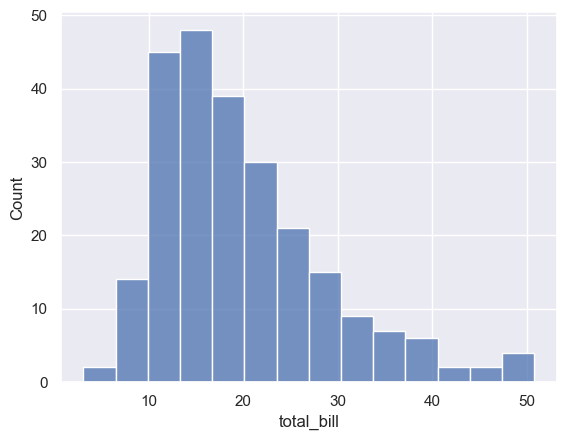

In [7]:
sns.histplot(data = tips_df["total_bill"]);

In [8]:
tips_df["total_bill"].value_counts().sort_values(ascending=False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

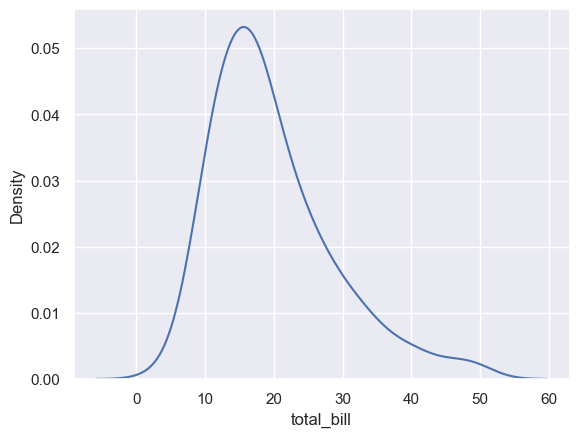

In [9]:
#KDE
sns.kdeplot(data = tips_df["total_bill"]);

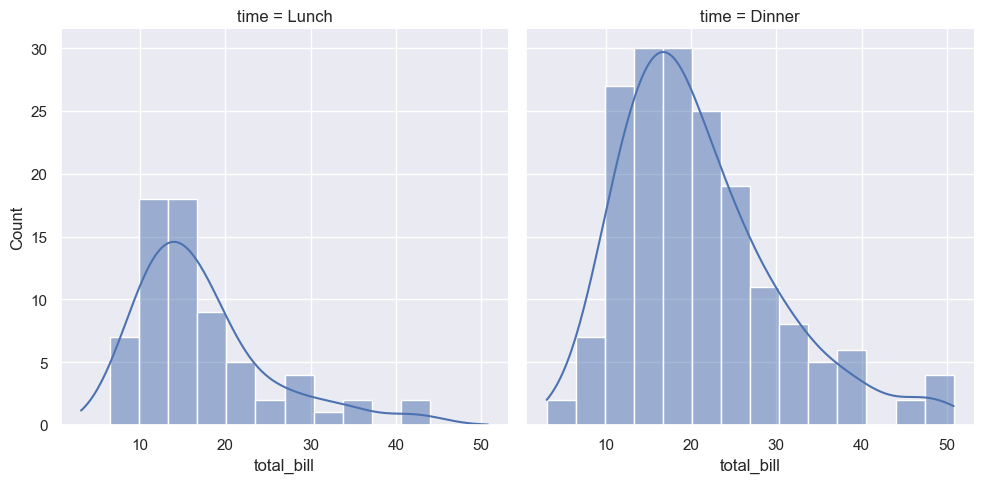

In [10]:
#Displot: include hist and KDE
sns.displot(data = tips_df, x = "total_bill", col = "time", kde = True);

In [11]:
#Bar Plot
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


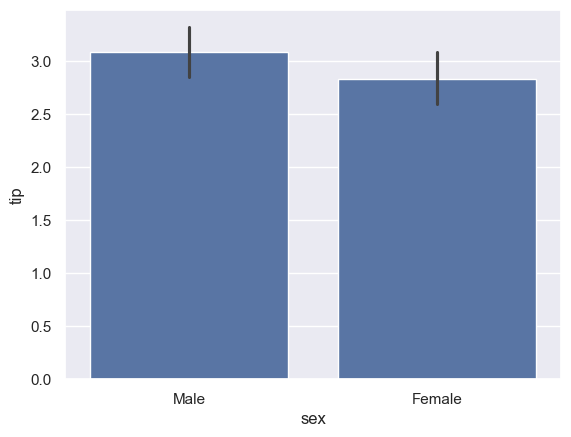

In [12]:
sns.barplot(data = tips_df, x = "sex", y = 'tip', estimator=np.mean);

In [13]:
#Count Plot
tips_df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

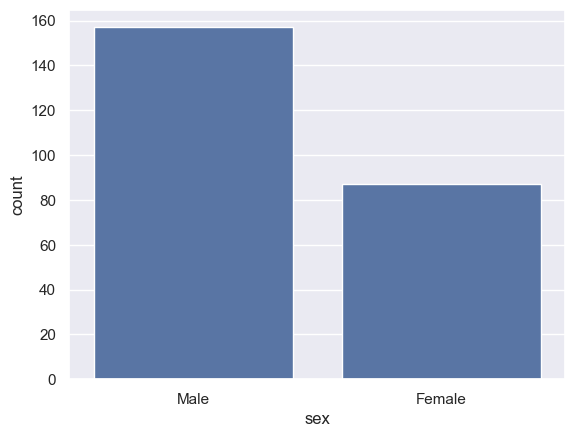

In [14]:
sns.countplot(data = tips_df, x='sex');

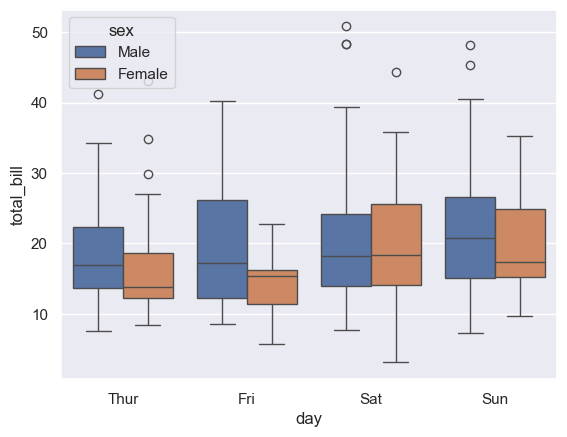

In [15]:
#Box Plot:
#Identify outliers
#Check if data is symmetrical
#Determine how tightly data is grouped
sns.boxplot(data=tips_df, x = 'day', y = 'total_bill', hue = 'sex');
#hue: creates the separate box plots of different categories

In [16]:
#Facet Grid
#Can be Draw with up to 3 dimensions: row, col and hue.
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


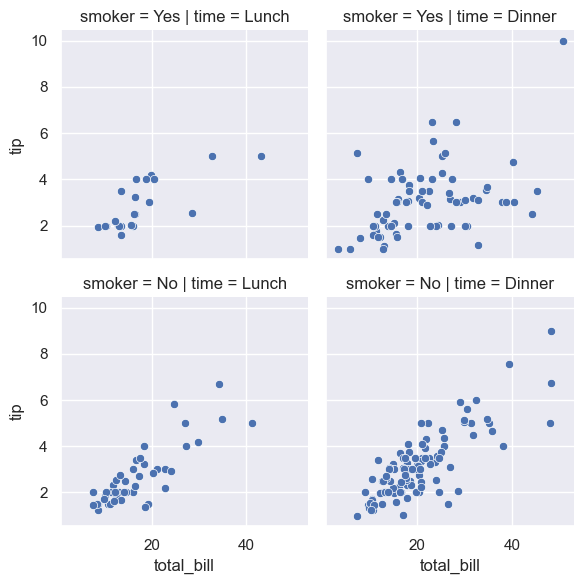

In [17]:
tips_fg = sns.FacetGrid(data = tips_df, row="smoker", col="time")#Create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot, 'total_bill', 'tip');#map: at least 2 dimensions

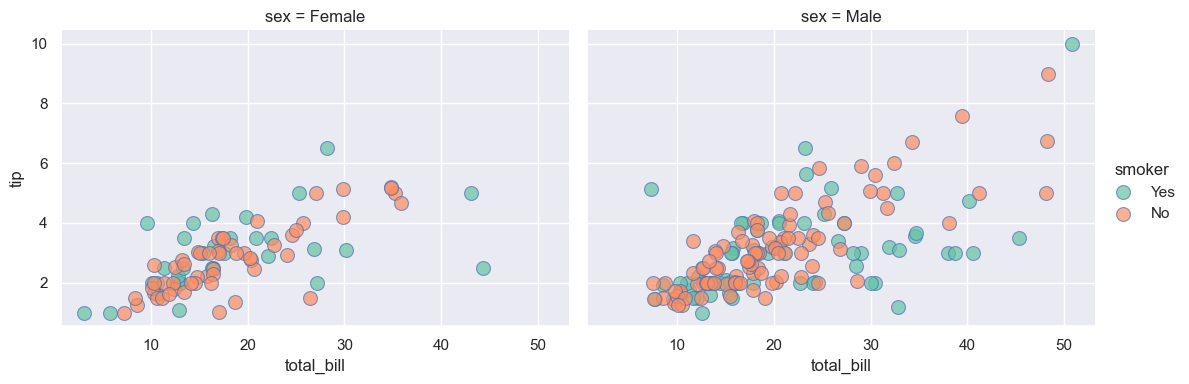

In [18]:
kws = dict(s=100, edgecolor = 'b', alpha = 0.7)#kws: zipped attribute
new_fg = sns.FacetGrid(data = tips_df, col='sex', hue='smoker',
                       col_order=['Female', 'Male'], 
                       palette='Set2',
                       height=4, aspect=1.4)#aspect: width
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws);#**zip: unzip
new_fg.add_legend();

In [21]:
#Joint plot
#Distribute between to variables along with each variable's marginal distribution
penguins_df = sns.load_dataset('penguins')
penguins_df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


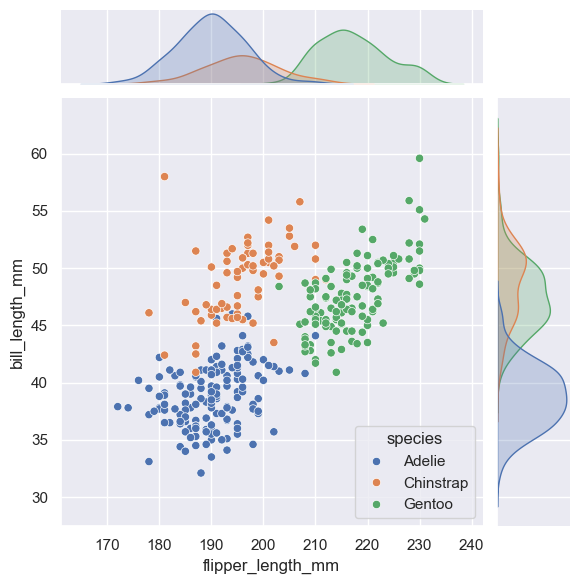

In [25]:
sns.jointplot(data = penguins_df, x='flipper_length_mm',y='bill_length_mm', hue = 'species');

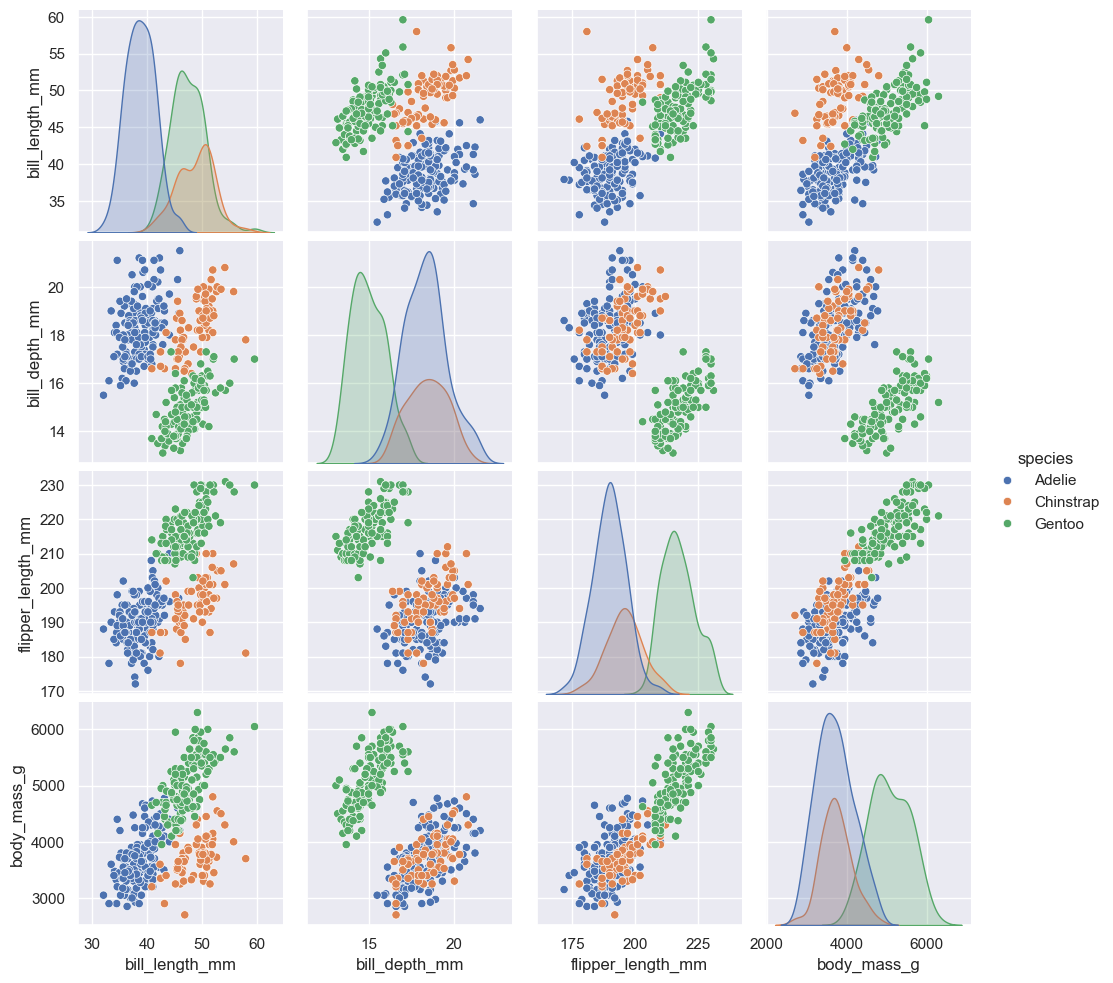

In [26]:
#Pair plots
sns.pairplot(data = penguins_df, hue = 'species');

In [29]:
#Heatmaps
#Describing density of intensity of variables, visuallize pattern, variance, and even anomalies
flight_df = sns.load_dataset('flights')
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [36]:
flights = pd.pivot_table(flight_df, index = 'month', columns='year', values='passengers',observed=False);
flights
#observed=True:
# When observed=True, only those values that are present in the input data will be included in the pivot table.
# This means that if there are any missing combinations of the index and columns, they will not appear in the resulting pivot table.
# It essentially restricts the pivot table to only contain combinations of values that are observed in the input data.

# observed=False:
# When observed=False, the pivot table will include all possible combinations of the index and columns, even if some combinations are not observed in the input data.
# Missing combinations will be filled with NaN (Not a Number) values in the resulting pivot table.
# This option is useful when you want to ensure that the resulting pivot table covers all possible combinations, even if some of them are missing in the input data.

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


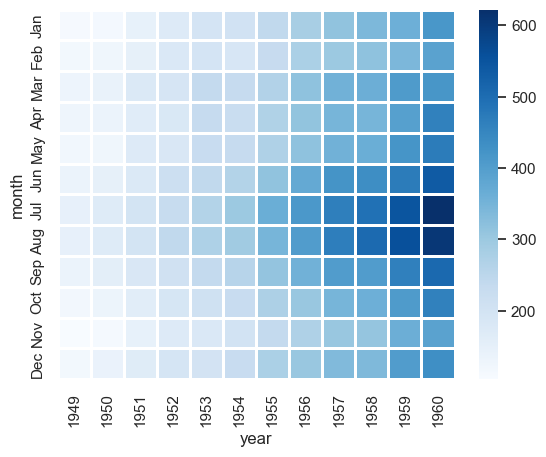

In [40]:
sns.heatmap(data = flights, cmap='Blues', linewidths=1);